In [1]:
%matplotlib inline

import geopandas
from libpysal import examples
import pysal
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mapclassify


### below work based on: https://darribas.org/gds_course/content/bD/lab_D.html

/Users/pjbitterman/opt/anaconda3/envs/geog432/lib/python3.9/site-packages/libpysal/cg/alpha_shapes.py:37: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def nb_dist(x, y):
/Users/pjbitterman/opt/anaconda3/envs/geog432/lib/python3.9/site-packages/libpysal/cg/alpha_shapes.py:163: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def get_faces(triangle):
/Users/pjbitter

In [2]:
# look at built-in datasets

examples.builtin_datasets

{'10740': <libpysal.examples.builtin.LocalExample at 0x7fa3c8f66100>,
 'arcgis': <libpysal.examples.builtin.LocalExample at 0x7fa3c8f66c10>,
 'baltim': <libpysal.examples.builtin.LocalExample at 0x7fa3c8f66b50>,
 'berlin': <libpysal.examples.builtin.LocalExample at 0x7fa3c8f66c70>,
 'book': <libpysal.examples.builtin.LocalExample at 0x7fa3c8f66a90>,
 'burkitt': <libpysal.examples.builtin.LocalExample at 0x7fa3c8f66a60>,
 'calemp': <libpysal.examples.builtin.LocalExample at 0x7fa3c8f66ac0>,
 'chicago': <libpysal.examples.builtin.LocalExample at 0x7fa3c8f66a00>,
 'columbus': <libpysal.examples.builtin.LocalExample at 0x7fa3c8f669d0>,
 'desmith': <libpysal.examples.builtin.LocalExample at 0x7fa3c8f668e0>,
 'geodanet': <libpysal.examples.builtin.LocalExample at 0x7fa3c8f66880>,
 'georgia': <libpysal.examples.builtin.LocalExample at 0x7fa3c8f66850>,
 'juvenile': <libpysal.examples.builtin.LocalExample at 0x7fa3c8f667c0>,
 'Line': <libpysal.examples.builtin.LocalExample at 0x7fa3c8f66790>,
 

In [3]:
# downloads available datasets first time, then displays what is/isn't available after
examples.available()


Example not downloaded: Chicago parcels
Example not downloaded: Chile Migration
Example not downloaded: Spirals


,Name,Description,Installed
0,10740,"Albuquerque, New Mexico, Census 2000 Tract Dat...",True
1,AirBnB,"Airbnb rentals, socioeconomics, and crime in C...",True
2,Atlanta,"Atlanta, GA region homicide counts and rates",True
3,Baltimore,Baltimore house sales prices and hedonics,True
4,Bostonhsg,Boston housing and neighborhood data,True
...,...,...,...
99,taz,Traffic Analysis Zones in So. California,True
100,tokyo,Tokyo Mortality data,True
101,us_income,Per-capita income for the lower 48 US states 1...,True
102,virginia,Virginia counties shapefile,True


In [4]:
# look at files within the 'georgia' dataset
examples.explain('georgia')

georgia

Various socio-economic variables for counties within the state of Georgia (1990)
-------------------------------------------------------------------------------

* G_utm.shp: attribute and geometry data. (n=159, k=17)

For testing against GWR4 GUI software
-------------------------------------

* georgia_BS_NN_listwise.csv: bisquare nearest neighbor kernel model output
* georgia_BS_NN_summary.txt: bisquare nearest neighbor kernel model summary
* georgia_BS_NN.ctl: bisquare nearest neighbor kernel control file

* georgia_GS_NN_listwise.csv: Gaussian nearest neighbor kernel model output
* georgia_GS_NN_summary.txt: Gaussian nearest neighbor kernel model summary
* georgia_GS_NN.ctl: Gaussian nearest neighbor kernel control file

* georgia_BS_F_listwise.csv: bisquare fixed kernel model output
* georgia_BS_F_summary.txt: bisquare fixed kernel model summary
* georgia_BS_F.ctl: bisquare fixed kernel control file

* georgia_GS_F_listwise.csv: Gaussian fixed kernel model output
* georg

In [5]:
# load the example, list corresponding files
georgia = examples.load_example("georgia")
georgia.get_file_list()

['/Users/pjbitterman/opt/anaconda3/envs/geog432/lib/python3.9/site-packages/libpysal/examples/georgia/GData_utm.csv',
 '/Users/pjbitterman/opt/anaconda3/envs/geog432/lib/python3.9/site-packages/libpysal/examples/georgia/georgia_GS_NN_listwise.csv',
 '/Users/pjbitterman/opt/anaconda3/envs/geog432/lib/python3.9/site-packages/libpysal/examples/georgia/FB.p',
 '/Users/pjbitterman/opt/anaconda3/envs/geog432/lib/python3.9/site-packages/libpysal/examples/georgia/georgia_GS_NN.ctl',
 '/Users/pjbitterman/opt/anaconda3/envs/geog432/lib/python3.9/site-packages/libpysal/examples/georgia/G_utm.sbx',
 '/Users/pjbitterman/opt/anaconda3/envs/geog432/lib/python3.9/site-packages/libpysal/examples/georgia/G_utm.shx',
 '/Users/pjbitterman/opt/anaconda3/envs/geog432/lib/python3.9/site-packages/libpysal/examples/georgia/georgia_BS_F.ctl',
 '/Users/pjbitterman/opt/anaconda3/envs/geog432/lib/python3.9/site-packages/libpysal/examples/georgia/G_utm.shp',
 '/Users/pjbitterman/opt/anaconda3/envs/geog432/lib/pytho

In [6]:
# read one of them using geopandas
db = geopandas.read_file(examples.get_path("G_utm.shp"))
db.info() #attributes


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   AREA       159 non-null    float64 
 1   PERIMETER  159 non-null    float64 
 2   G_UTM_     159 non-null    int64   
 3   G_UTM_ID   159 non-null    int64   
 4   Latitude   159 non-null    float64 
 5   Longitud   159 non-null    float64 
 6   TotPop90   159 non-null    int64   
 7   PctRural   159 non-null    float64 
 8   PctBach    159 non-null    float64 
 9   PctEld     159 non-null    float64 
 10  PctFB      159 non-null    float64 
 11  PctPov     159 non-null    float64 
 12  PctBlack   159 non-null    float64 
 13  X          159 non-null    float64 
 14  Y          159 non-null    int64   
 15  AreaKey    159 non-null    int64   
 16  geometry   159 non-null    geometry
dtypes: float64(11), geometry(1), int64(5)
memory usage: 21.2 KB


In [22]:
db.crs # look at the CRS


<Projected CRS: EPSG:26917>
Name: NAD83 / UTM zone 17N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: North America - 84°W to 78°W and NAD83 by country
- bounds: (-84.0, 23.81, -78.0, 84.0)
Coordinate Operation:
- name: UTM zone 17N
- method: Transverse Mercator
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

<Axes: >

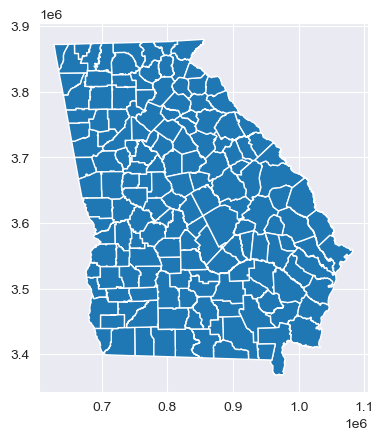

In [23]:
# plot it
db.plot()

<Axes: >

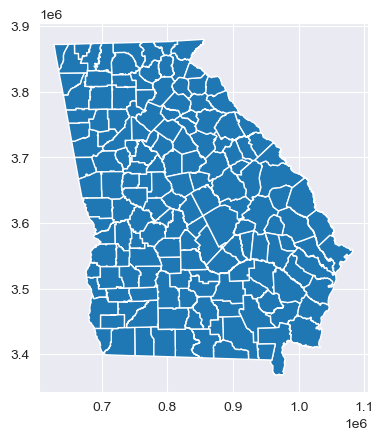

In [8]:
db.crs = "EPSG:26917" # this is how you define a projection (using the original CRS)
db.plot()

/Users/pjbitterman/opt/anaconda3/envs/geog432/lib/python3.9/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

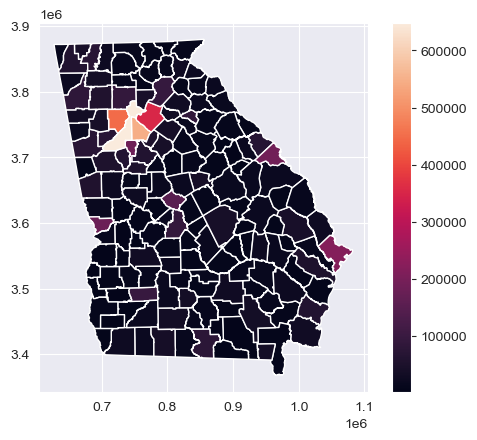

In [9]:
# continuous shading on total population

db.plot(column="TotPop90", 
        categorical = False, 
        legend = True
       )

/Users/pjbitterman/opt/anaconda3/envs/geog432/lib/python3.9/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

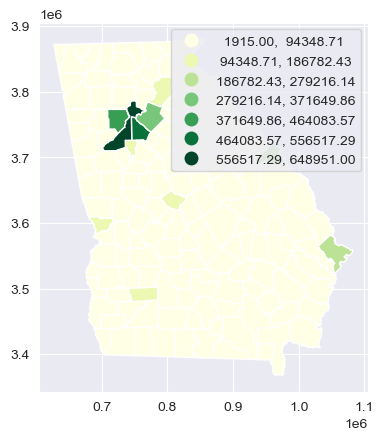

In [10]:
# equal interval classification scheme

db.plot(column="TotPop90", 
        scheme="equal_interval", 
        k=7,
        cmap="YlGn",
        legend=True
       )

/Users/pjbitterman/opt/anaconda3/envs/geog432/lib/python3.9/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

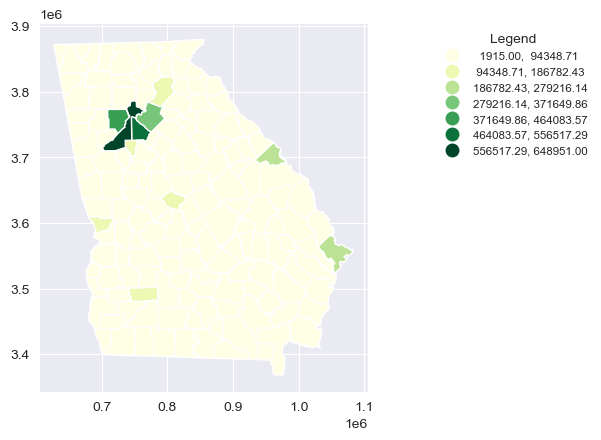

In [11]:
### let's move the legend out of the way

db.plot(column="TotPop90", 
        scheme="equal_interval", 
        k=7,
        cmap="YlGn",
        legend=True,
        legend_kwds=dict(loc='upper right',
                            bbox_to_anchor=(1.7, 1),
                            fontsize='small',
                            title="Legend",
                            frameon=False)
       )


/Users/pjbitterman/opt/anaconda3/envs/geog432/lib/python3.9/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


<Axes: >

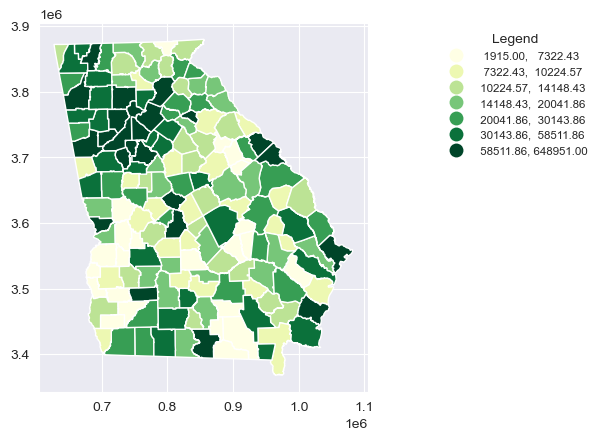

In [12]:
### quantiles classification scheme

db.plot(column="TotPop90", 
        scheme="quantiles", 
        k=7,
        cmap="YlGn",
        legend=True,
        legend_kwds=dict(loc='upper right',
                            bbox_to_anchor=(1.7, 1),
                            fontsize='small',
                            title="Legend",
                            frameon=False)
       )

In [13]:
# develop a classification scheme based on quantiles

classi = mapclassify.Quantiles(db["TotPop90"], k=7)
classi

Quantiles

       Interval          Count
------------------------------
[  1915.00,   7322.43] |    23
(  7322.43,  10224.57] |    23
( 10224.57,  14148.43] |    22
( 14148.43,  20041.86] |    23
( 20041.86,  30143.86] |    22
( 30143.86,  58511.86] |    23
( 58511.86, 648951.00] |    23

In [14]:
classi.bins

array([  7322.42857143,  10224.57142857,  14148.42857143,  20041.85714286,
        30143.85714286,  58511.85714286, 648951.        ])

/var/folders/wc/y8x0lwys7d7c8tfp4kpwxy8w0000gn/T/ipykernel_40466/3448532453.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(db["TotPop90"], shade=True)
/Users/pjbitterman/opt/anaconda3/envs/geog432/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/pjbitterman/opt/anaconda3/envs/geog432/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/pjbitterman/opt/anaconda3/envs/geog432/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype 

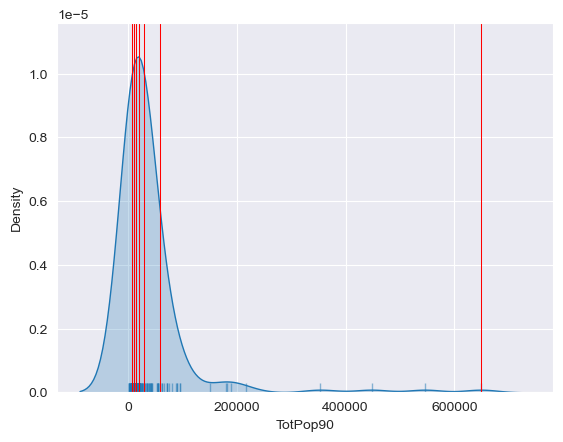

In [15]:
# Set up the figure
f, ax = plt.subplots(1)
# Plot the kernel density estimation (KDE)
sns.kdeplot(db["TotPop90"], shade=True)
# Add a blue tick for every value at the bottom of the plot (rugs)
sns.rugplot(db["TotPop90"], alpha=0.5)
# Loop over each break point and plot a vertical red line
for cut in classi.bins:
    plt.axvline(cut, color='red', linewidth=0.75)
# Display image
plt.show()

/Users/pjbitterman/opt/anaconda3/envs/geog432/lib/python3.9/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):
/Users/pjbitterman/opt/anaconda3/envs/geog432/lib/python3.9/site-packages/mapclassify/classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(


<Axes: >

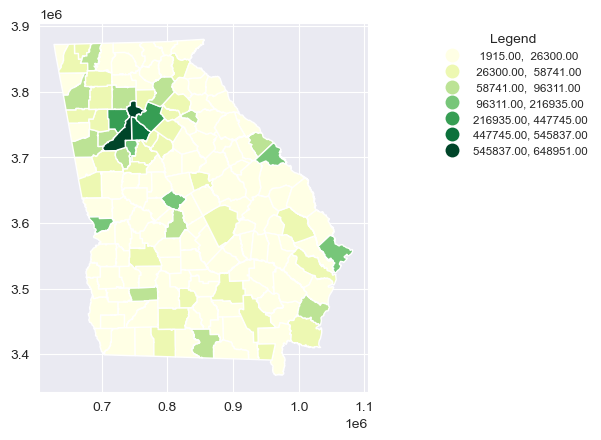

In [19]:
### jenks (natural breaks) classification scheme

db.plot(column="TotPop90", 
        scheme="fisher_jenks", 
        k=7,
        cmap="YlGn",
        legend=True,
        legend_kwds=dict(loc='upper right',
                            bbox_to_anchor=(1.7, 1),
                            fontsize='small',
                            title="Legend",
                            frameon=False)
       )

In [20]:
classi = mapclassify.FisherJenks(db["TotPop90"], k=7)
classi

/Users/pjbitterman/opt/anaconda3/envs/geog432/lib/python3.9/site-packages/mapclassify/classifiers.py:1860: UserWarning: Numba not installed. Using slow pure python version.
  warnings.warn(


FisherJenks

       Interval          Count
------------------------------
[  1915.00,  26300.00] |   109
( 26300.00,  58741.00] |    28
( 58741.00,  96311.00] |    13
( 96311.00, 216935.00] |     5
(216935.00, 447745.00] |     2
(447745.00, 545837.00] |     1
(545837.00, 648951.00] |     1

/Users/pjbitterman/opt/anaconda3/envs/geog432/lib/python3.9/site-packages/geopandas/plotting.py:730: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(values.dtype):


(700000.0, 800000.0)

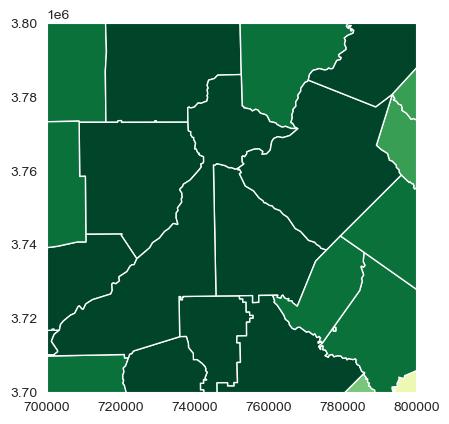

In [21]:
### Zoom in example

# Setup the figure
f, ax = plt.subplots(1)
# Draw the choropleth
db.plot(column="TotPop90", 
        scheme="quantiles", 
        k=7,
        cmap="YlGn",
        legend=False,
        ax=ax
       )
# Redimensionate X and Y axes to desired bounds - zoom into ATL area
ax.set_ylim(3700000, 3800000)
ax.set_xlim(700000, 800000)